# Question 1: Linear regression : NYC property sales dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
url = "https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/HW_data/HW4/nyc-rolling-sales_clean.csv"
df = pd.read_csv(url)
rand_state = 1000

### Part 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         30236 non-null  object 
 1   NEIGHBORHOOD                    30236 non-null  object 
 2   BUILDING CLASS CATEGORY         30236 non-null  object 
 3   TAX CLASS AT PRESENT            30236 non-null  object 
 4   BUILDING CLASS AT PRESENT       30236 non-null  object 
 5   ZIP CODE                        30236 non-null  int64  
 6   RESIDENTIAL UNITS               30236 non-null  int64  
 7   COMMERCIAL UNITS                30236 non-null  int64  
 8   TOTAL UNITS                     30236 non-null  int64  
 9   LAND SQUARE FEET                30236 non-null  float64
 10  GROSS SQUARE FEET               30236 non-null  float64
 11  YEAR BUILT                      30236 non-null  int64  
 12  TAX CLASS AT TIME OF SALE       

We are going to set the variables to be their respective data types.

In [4]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [6]:
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')
df['sale_year'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df['sale_month'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
pd.crosstab(df['sale_month'],df['sale_year'])
df.replace(' ',np.nan, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         30236 non-null  category      
 1   NEIGHBORHOOD                    30236 non-null  category      
 2   BUILDING CLASS CATEGORY         30236 non-null  category      
 3   TAX CLASS AT PRESENT            30236 non-null  category      
 4   BUILDING CLASS AT PRESENT       30236 non-null  category      
 5   ZIP CODE                        30236 non-null  category      
 6   RESIDENTIAL UNITS               30236 non-null  int64         
 7   COMMERCIAL UNITS                30236 non-null  int64         
 8   TOTAL UNITS                     30236 non-null  int64         
 9   LAND SQUARE FEET                30236 non-null  float64       
 10  GROSS SQUARE FEET               30236 non-null  float64       
 11  YE

<br />

### Part 2

In [8]:
# Adding the Target Variable
target = np.log(df['SALE PRICE'])

Using log() helps simplify the target varaible of Sale Price because it makes the values much smaller than their original price. The orginal shows what the price was for each apartment/home, but using log() has significantly cut down the variable size and we can now see the percent change in the target variable compared to the explanatory variables. It will also fit the variables to a more normaly shaped curve.

<br />

### Part 3

In [9]:
# My feature variables are all of the variables besides Sale Price.
X = df.drop(['SALE PRICE', 'SALE DATE'], axis=1)

In [10]:
X.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,sale_year,sale_month
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,2016,9
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,2016,9
2,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,2016,11
3,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,2016,9
4,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,2017,8


### Part 4

In [11]:
# Turn Categorical variables into dummy
X_dm =pd.get_dummies(X, drop_first=True)

### Part 5

In [12]:
X_dm.columns

Index(['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BOROUGH_Brooklyn',
       'BOROUGH_Manhattan', 'BOROUGH_Queens', 'BOROUGH_Staten Island',
       'NEIGHBORHOOD_ALPHABET CITY',
       ...
       'sale_month_3', 'sale_month_4', 'sale_month_5', 'sale_month_6',
       'sale_month_7', 'sale_month_8', 'sale_month_9', 'sale_month_10',
       'sale_month_11', 'sale_month_12'],
      dtype='object', length=843)

In [13]:
# Splitting up the data into training and testing sets, 70% training, 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dm, target, test_size=0.3, random_state=rand_state)
np.round(len(X_train)/len(X),3)

0.7

### Part 6

In [14]:
reg_model = LinearRegression( )
reg_model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_hat_test = reg_model.predict(X_test)

In [16]:
log_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat_test, 'resid': y_test - y_hat_test})
log_predictions.head()

,actuals,predictions,resid
3767,14.077875,13.675357,0.402518
24270,13.199324,13.102322,0.097002
27718,13.384728,13.199260,0.185467
6232,12.873902,13.139877,-0.265975
11161,13.710150,13.911801,-0.201651


In [17]:
MSE_test = np.mean(np.square(log_predictions['resid']))
RMSE_test = np.sqrt(MSE_test)
print("The RMSE test is", np.round(RMSE_test,3))

The RMSE test is 0.529


### Part 7

In [18]:
from sklearn.model_selection import cross_val_score
my_estimator = LinearRegression()

In [19]:
MSE10 = -cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")

In [20]:
RMSE10 = np.sqrt(MSE10)
RMSE_CV10 = np.mean(RMSE10)
np.round(RMSE_CV10,3)

0.834

<br />

<br />

### Part 8

By using the cross validation k = 5 and k = 10, we trained the model to perform better. You can see you that RMSE with k = 10 is smaller than the the previous RMSE in part 3. This means there would be smaller residuals and that our model will perform better with k =10 than the previous.

# Question 2: Polynomial regression: Boston dataset

In [21]:
# Load in the csv and look at the top 5 variables
url2 = "https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/HW_data/HW4/boston_polynomial.csv"
df2 = pd.read_csv(url2)
df2.head(5)

,price,LSTAT
0,24.0,4.98
1,21.6,9.14
2,34.7,4.03
3,33.4,2.94
4,36.2,5.33


### Part 1

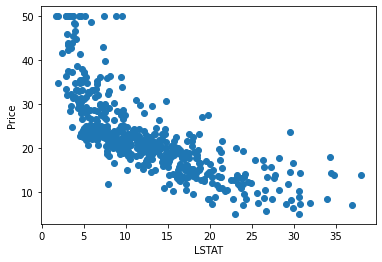

In [22]:
# Create 2 arroys and then make a scatter plot with the 2 arrays LSTAT and Price
x = np.array(df2['LSTAT'])
y = np.array(df2['price'])
plt.scatter(x, y)
plt.xlabel("LSTAT")
plt.ylabel("Price")
plt.show()

### Part 2

In [23]:
from sklearn.preprocessing import PolynomialFeatures as pf

In [24]:
# Call the PolynomialFeatures package and fit transform the x variables and name them X_poly
poly = pf(degree = 5)
X_poly= pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))
X_poly.head()

,0,1,2,3,4,5
0,1.0,4.98,24.8004,123.505992,615.059840,3062.998004
1,1.0,9.14,83.5396,763.551944,6978.864768,63786.823981
2,1.0,4.03,16.2409,65.450827,263.766833,1062.980336
3,1.0,2.94,8.6436,25.412184,74.711821,219.652754
4,1.0,5.33,28.4089,151.419437,807.065599,4301.659644


### Part 3

In [25]:
# Split the data into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=1000)
X_train.head()

,0,1,2,3,4,5
266,1.0,14.79,218.7441,3235.225239,47848.981285,707686.433202
363,1.0,14.64,214.3296,3137.785344,45937.177436,672520.277665
78,1.0,12.34,152.2756,1879.080904,23187.858355,286138.172105
180,1.0,7.56,57.1536,432.081216,3266.533993,24694.996987
229,1.0,3.76,14.1376,53.157376,199.871734,751.517719


### Part 4

In [26]:
reg_model = LinearRegression( )
reg_model.fit(X_train, y_train)
y_hat_test = reg_model.predict(X_test)

In [27]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat_test, 'resid': y_test - y_hat_test})
df_predictions.head()

,actuals,predictions,resid
0,21.8,21.514132,0.285868
1,10.2,18.150191,-7.950191
2,15.2,16.197956,-0.997956
3,43.5,40.765901,2.734099
4,50.0,22.373052,27.626948


In [28]:
MSE_test = np.mean(np.square(df_predictions['resid']))
RMSE_test = np.sqrt(MSE_test)
print("The RMSE test is", np.round(RMSE_test,3))

The RMSE test is 5.204


### Part 5

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
# Running a 5 fold cross validation
my_estimator = LinearRegression()
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")
R2

array([0.67382444, 0.72048494, 0.69952034, 0.53858475, 0.71837563])

In [31]:
R2_CV = np.mean(R2)
np.round(R2_CV,3)
# The estimated version of R2 is .67

0.67

In [32]:
MSE = -cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [33]:
# Finding the estimated version of RMSE
RMSE = np.sqrt(MSE)
RMSE_CV5 = np.mean(RMSE)
np.round(RMSE_CV5,3)

5.262

The estimated version of RMSE_test is about 5.262.

### Part 6

In [34]:
def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=1000):
    
    poly_features= pf(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)


  
#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))
    
    return poly_degree, RMSE_train, RMSE_test

In [35]:
my_polynomial_regression(poly_degree=5,X=x,y=y)

(5, 5.2, 5.2)

In [36]:
my_polynomial_regression(poly_degree=1, X=x, y=y)

(1, 6.48, 5.54)

In [37]:
returns= []
for i in range(1,11):
    returns.append(my_polynomial_regression(poly_degree=i, X=x,y=y))
    
output = pd.DataFrame(returns, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,6.48,5.54
1,2,5.64,5.20
2,3,5.40,5.37
3,4,5.26,5.31
4,5,5.20,5.20
5,6,5.20,5.19
6,7,5.19,5.21
7,8,5.19,5.20
8,9,5.18,5.17
9,10,5.19,5.19


### Part 7

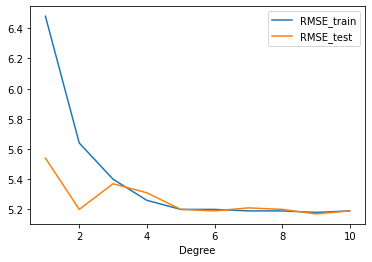

In [38]:
output.set_index('Degree').plot()
plt.show()

### Part 8

The optimal polynomial degree in this case would be 3. If we are using the elbow method we would choose 3 because it is the point that is after the first hitch (elbow) in the data that happens at degree 2. 